In [1]:
from src import physics

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
libphysics = physics.load_library('libs/libphysics.so')
planets = libphysics.new_planets([(10., 20.), (-20., -30)])
missiles = libphysics.new_missiles(3)

In [8]:
def shoot(missile, *, pos, vel, n=6):
    missile.launch(pos=pos, vel=vel)

    x = np.empty((0, 3))
    v = np.empty((0, 3))
    
    premature = False
    while n > 0 and not premature:
        n -= 1
        premature = missile.propagate(planets, 1e-3)
        
        x = np.concatenate((x, missile.trajectory['x']), axis=0)
        v = np.concatenate((v, missile.trajectory['v']), axis=0)

    lat = np.arcsin(x[:, 2])
    lon = np.arctan2(x[:, 0], x[:, 1])
    
    # vlat = np.arcsin(v[:, 2])
    # vlon = np.arctan2(v[:, 0], v[:, 1])

    return np.rad2deg(lat), np.rad2deg(lon) #, np.rad2deg(vlat), np.rad2deg(vlon)

In [9]:
lat1, lon1 = shoot(missiles[0], pos=(5., 40.), vel=(50., 0.))
lat1[-1], lon1[-1]

(7.11365010569688, 15.944016653464097)

In [83]:
v = 179.
psi = 150.
vlat2 = v * np.sin(np.deg2rad(psi))
vlon2 = v * np.cos(np.deg2rad(psi))

lat2, lon2 = shoot(missiles[0], pos=(lat1[-1], lon1[-1]), vel=(vlat2, vlon2))
lat2.shape

(116,)

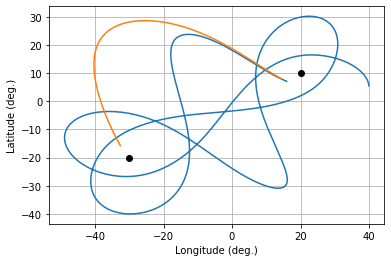

In [84]:
fig, ax = plt.subplots()
ax.plot(lon1, lat1)
ax.plot(lon2, lat2)

ax.grid()
ax.set_xlabel('Longitude (deg.)')
ax.set_ylabel('Latitude (deg.)')

for plat, plon in planets.planet_pos:
    ax.plot(plon, plat, 'o', c='black')